# Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

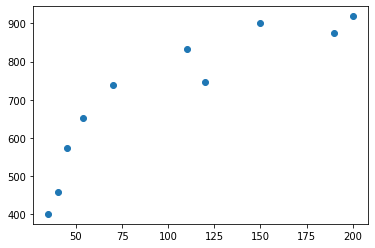

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
X = x.reshape(10, 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [7]:
y = y.reshape(10, 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [8]:

X = np.hstack([np.ones((10, 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [9]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

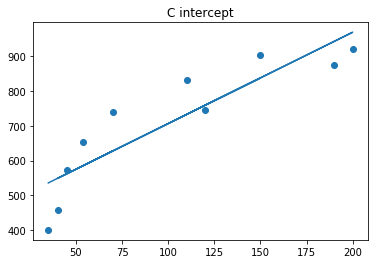

In [10]:
plt.scatter(X[0:, 1:], y)
plt.plot(X[0:, 1:], 444.1773 + X[0:, 1:] * 2.6205)
plt.title("С intercept")
plt.show()

In [11]:
B2 = np.dot(np.linalg.inv(np.dot(X[0:, 1:].T, X[0:, 1:])), X[0:, 1:].T@y)
B2

array([[5.88982042]])

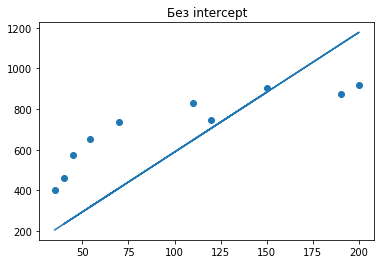

In [12]:

plt.scatter(X[0:, 1:], y)
plt.plot(X[0:, 1:], X[0:, 1:] * 5.8898)
plt.title("Без intercept")
plt.show()

In [13]:
y_hat = 444.1773 + X[0:, 1:] * 2.6205
mse = ((y-y_hat)**2).sum()/10
mse

6470.414222460003

In [14]:
y_hat2 = X[0:, 1:] * 5.8898
mse2 = ((y-y_hat2)**2).sum()/10
mse2

56516.858421464

# Здание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [15]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n

In [16]:
alpha = 1e-6
alpha

1e-06

In [17]:
B1 = 1
n = 10

In [18]:
for i in range(100):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%10==0:
        print('Iteration={i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration=0, B1=1.136148, mse=900647.30751845
Iteration=10, B1=2.3074430587633947, mse=764473.973167137
Iteration=20, B1=3.1932027130216003, mse=686600.1962707833
Iteration=30, B1=3.863034075530662, mse=642066.3295119822
Iteration=40, B1=4.3695756097310365, mse=616598.6384928308
Iteration=50, B1=4.75263370499393, mse=602034.3679038913
Iteration=60, B1=5.042310847813165, mse=593705.4629541517
Iteration=70, B1=5.261371215182051, mse=588942.3917630354
Iteration=80, B1=5.4270295894837375, mse=586218.5226219487
Iteration=90, B1=5.552304176146257, mse=584660.8169316365


In [19]:
mse_(5.261371215182051)

588942.3917630354

In [20]:

B0 = 1
B1 = 1
n = 10
alpha = 1e-6
alpha2 = 1e-1

In [21]:

def mse_(B0, B1, y=y, X=X, n=10):
    return np.sum((B0+B1*X-y)**2)/n

In [22]:
for i in range(5000):
    B0 -=alpha2*(2/n)*np.sum((B0+B1*X-y))
    B1 -=alpha*(2/n)*np.sum((B0+B1*X-y)*X)
    if i%500==0:
        print('Iteration={i}, B0={B0}, B1={B1}, mse={mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B0,B1)))

Iteration=0, B0=264.08000000000004, B1=1.082064416, mse=355964.9266158006
Iteration=500, B0=654.960404158436, B1=1.073037764978149, mse=51111.326008606644
Iteration=1000, B0=654.9618871317274, B1=1.0730100167029668, mse=51111.326002024674
Iteration=1500, B0=654.961887443225, B1=1.0730100108744582, mse=51111.32600202467
Iteration=2000, B0=654.96188744329, B1=1.0730100108732403, mse=51111.32600202468
Iteration=2500, B0=654.96188744329, B1=1.0730100108732403, mse=51111.32600202468
Iteration=3000, B0=654.96188744329, B1=1.0730100108732403, mse=51111.32600202468
Iteration=3500, B0=654.96188744329, B1=1.0730100108732403, mse=51111.32600202468
Iteration=4000, B0=654.96188744329, B1=1.0730100108732403, mse=51111.32600202468
Iteration=4500, B0=654.96188744329, B1=1.0730100108732403, mse=51111.32600202468


In [23]:
mse_(654.96188744329,1.0730100108732403)

51111.32600202468